In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from patsy import dmatrices
%matplotlib inline
plt.style.use('dark_background')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
Tc = np.array([
    2458962.86400, 2458976.87712, 2458997.89086, 2459003.49610, 2459011.91238,
    2459301.99500, 2459346.83850, 2459353.82930, 2459367.85766, 2459381.85900,
    2459395.88800, 2459409.90200, 2459422.51500, 2459440.73108, 2459443.51780,
    2459447.73700, 2459461.75100
])
Tc_error = np.array([
    0.0007, 0.0007, 0.0008, 0.0041, 0.0006, 0.0009, 0.0011, 0.0024, 0.0007,
    0.0092, 0.0020, 0.0019, 0.0015, 0.0006, 0.0046, 0.0012, 0.0100
])

In [15]:
Tc_0 = Tc - Tc[0]
#print(Tc_obs_0)
P = 1.4013788  #orbital period for WASP-135
orbit = np.rint(Tc_0 /P)  #number of orbits since first observation (rounded to nearest integer)
#print(orbit)

P = 1.4013707604029817 days
T0 = 2458962.863007541


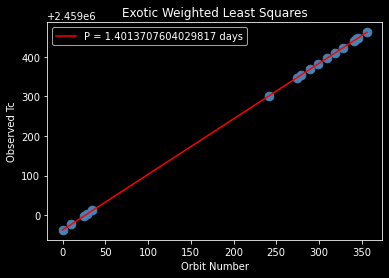

In [16]:
m_weighted, b_weighted = np.polyfit(orbit, Tc, 1, w= 1/Tc_error**2)
X = np.linspace(min(orbit), max(orbit), 1000)
plt.plot(X, m_weighted * X + b_weighted, c='r', 
         label = "P = 1.4013707604029817 days")
plt.scatter(orbit, Tc, c="steelblue", s=75)
plt.xlabel("Orbit Number")
plt.ylabel("Observed Tc")
plt.title("Exotic Weighted Least Squares")
plt.legend()
print("P =", m_weighted, "days")
print("T0 =", b_weighted)
#plt.savefig("Exotic Weighted Least Squares")

P = 1.4013668146647005 days
T0 = 2458962.8608882776


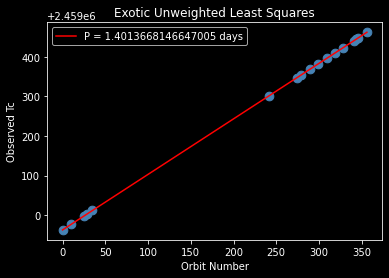

In [17]:
m_unweighted, b_unweighted = np.polyfit(orbit, Tc, 1)
X = np.linspace(min(orbit), max(orbit), 1000)
plt.plot(X, m_unweighted * X + b_unweighted, c='r', 
         label = "P = 1.4013668146647005 days")
plt.scatter(orbit, Tc, c="steelblue", s=75)
plt.xlabel("Orbit Number")
plt.ylabel("Observed Tc")
plt.title("Exotic Unweighted Least Squares")
plt.legend()
print("P =", m_unweighted, "days")
print("T0 =", b_unweighted)
#plt.savefig("Exotic Unweighted Least Squares")

In [18]:
mod_wls = sm.WLS(Tc, orbit, weights=1.0 / (Tc_error ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.560
Model:                            WLS   Adj. R-squared (uncentered):              0.532
Method:                 Least Squares   F-statistic:                              20.35
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    0.000356
Time:                        16:59:38   Log-Likelihood:                         -275.37
No. Observations:                  17   AIC:                                      552.7
Df Residuals:                      16   BIC:                                      553.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\jtear\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
result = stats.linregress(orbit, Tc)
print(result)

LinregressResult(slope=1.4013668146622542, intercept=2458962.860888278, rvalue=0.9999999994837402, pvalue=8.145146257334333e-69, stderr=1.1626670297266506e-05, intercept_stderr=0.0030532978491323356)


P = 1.4013668146622542 days
T0 = 2458962.860888278
Standard Error = 1.1626670297266506e-05


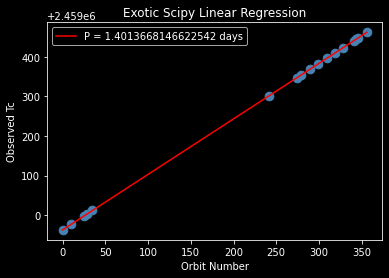

In [20]:
X = np.linspace(min(orbit), max(orbit), 1000)
plt.plot(X, result[0] * X + result[1], c='r', 
         label = "P = 1.4013668146622542 days")
plt.scatter(orbit, Tc, c="steelblue", s=75)
plt.xlabel("Orbit Number")
plt.ylabel("Observed Tc")
plt.title("Exotic Scipy Linear Regression")
plt.legend()
print("P =",result[0], "days")
print("T0 =", result[1])
print("Standard Error =",result[4])

## TESS

In [21]:
Tc_TESS = np.array([
    2459010.505457, 2459011.907480, 2459013.306791, 2459014.708736,
    2459016.112606, 2459017.512587, 2459018.917012, 2459020.316235,
    2459021.719924, 2459024.522396, 2459025.920838, 2459027.324882,
    2459028.723406, 2459030.126016, 2459031.525902, 2459032.917432,
    2459034.332732
])
Tc_error_TESS = np.array([
    0.001792, 0.001963, 0.003364, 0.001721, 0.001637, 0.002044, 0.001997,
    0.001808, 0.002452, 0.001962, 0.002737, 0.001878, 0.001949, 0.002441,
    0.002558, 0.001763, 0.002178
])
Tc_0_TESS = Tc_TESS - Tc_TESS[0]
#print(Tc_obs_0)
P = 1.4013788  #orbital period for WASP-135
orbit_TESS = np.rint(Tc_0_TESS /P)  #number of orbits since first observation (rounded to nearest integer)
print("Tc_0_TESS =",Tc_0_TESS)
print("Orbit TESS =",orbit_TESS)

Tc_0_TESS = [ 0.        1.402023  2.801334  4.203279  5.607149  7.00713   8.411555
  9.810778 11.214467 14.016939 15.415381 16.819425 18.217949 19.620559
 21.020445 22.411975 23.827275]
Orbit TESS = [ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. 12. 13. 14. 15. 16. 17.]


P = 1.4011743556040184 days
T0 = 2459010.507190219


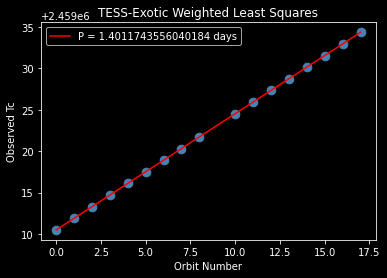

In [22]:
m_weighted_TESS, b_weighted_TESS = np.polyfit(orbit_TESS, Tc_TESS, 1, w= 1/Tc_error_TESS**2)
X_TESS = np.linspace(min(orbit_TESS), max(orbit_TESS), 1000)
plt.plot(X_TESS, m_weighted_TESS * X_TESS + b_weighted_TESS, c='r', 
         label = "P = 1.4011743556040184 days")
plt.scatter(orbit_TESS, Tc_TESS, c="steelblue", s=75)
plt.xlabel("Orbit Number")
plt.ylabel("Observed Tc")
plt.title("TESS-Exotic Weighted Least Squares")
plt.legend()
print("P =", m_weighted_TESS, "days")
print("T0 =", b_weighted_TESS)
#plt.savefig("TESS-Exotic Weighted Least Squares")

In [23]:
mod_wls_TESS = sm.WLS(Tc_TESS, orbit_TESS, weights=1.0 / (Tc_error_TESS ** 2))
res_wls_TESS = mod_wls_TESS.fit()
print(res_wls_TESS.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.696
Model:                            WLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                              36.55
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    1.70e-05
Time:                        16:59:39   Log-Likelihood:                         -264.70
No. Observations:                  17   AIC:                                      531.4
Df Residuals:                      16   BIC:                                      532.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\jtear\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [24]:
result_TESS = stats.linregress(orbit_TESS, Tc_TESS)
result_TESS

LinregressResult(slope=1.4013114538299076, intercept=2459010.506563685, rvalue=0.9999999163920341, pvalue=3.028613255193713e-52, stderr=0.00014795440373325893, intercept_stderr=0.0014812836546734287)

## Combined Observations

In [32]:
Tc_comb = np.concatenate((Tc, Tc_TESS))
Tc_comb_error = np.concatenate((Tc_error, Tc_error_TESS))
Tc_0_comb = Tc_comb - Tc_comb[0]
#print(Tc_obs_0)
P = 1.4013788  #orbital period for WASP-135
orbit_comb = np.rint(Tc_0_comb /P) #number of orbits since first observation (rounded to nearest int)
print(len(Tc_comb))
#print(Tc_comb)

34
[2458962.864    2458976.87712  2458997.89086  2459003.4961
 2459011.91238  2459301.995    2459346.8385   2459353.8293
 2459367.85766  2459381.859    2459395.888    2459409.902
 2459422.515    2459440.73108  2459443.5178   2459447.737
 2459461.751    2459010.505457 2459011.90748  2459013.306791
 2459014.708736 2459016.112606 2459017.512587 2459018.917012
 2459020.316235 2459021.719924 2459024.522396 2459025.920838
 2459027.324882 2459028.723406 2459030.126016 2459031.525902
 2459032.917432 2459034.332732]


P = 1.4013713680241304 days
T0 = 2458962.8627927657


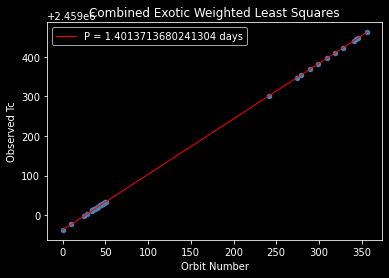

In [26]:
m_weighted_comb, b_weighted_comb = np.polyfit(orbit_comb, Tc_comb, 1, w= 1/Tc_comb_error**2)
X_comb = np.linspace(min(orbit_comb), max(orbit_comb), 1000)
plt.plot(X_comb, m_weighted_comb * X_comb + b_weighted_comb, c='r',lw=1, 
         label = "P = 1.4013713680241304 days")
plt.scatter(orbit_comb, Tc_comb, c="steelblue", s=20)
plt.xlabel("Orbit Number")
plt.ylabel("Observed Tc")
plt.title("Combined Exotic Weighted Least Squares")
plt.legend()
print("P =", m_weighted_comb, "days")
print("T0 =", b_weighted_comb)
#plt.savefig("Combined Exotic Weighted Least Squares")

In [27]:
mod_wls_comb = sm.WLS(Tc_comb, orbit_comb, weights=1.0 / (Tc_comb_error ** 2))
res_wls_comb = mod_wls_comb.fit()
print(res_wls_comb.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.504
Model:                            WLS   Adj. R-squared (uncentered):              0.489
Method:                 Least Squares   F-statistic:                              33.56
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    1.77e-06
Time:                        16:59:39   Log-Likelihood:                         -549.25
No. Observations:                  34   AIC:                                      1101.
Df Residuals:                      33   BIC:                                      1102.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
result_comb = stats.linregress(orbit_comb, Tc_comb)
result_comb

LinregressResult(slope=1.4013700637639925, intercept=2458962.859821239, rvalue=0.9999999996577054, pvalue=3.257272897979774e-148, stderr=6.48175918920029e-06, intercept_stderr=0.0012195103826090348)

### Statsmodels

In [29]:
mod_wls = sm.WLS(Tc, orbit, weights=1.0 / (Tc_error ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())


                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.560
Model:                            WLS   Adj. R-squared (uncentered):              0.532
Method:                 Least Squares   F-statistic:                              20.35
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    0.000356
Time:                        16:59:39   Log-Likelihood:                         -275.37
No. Observations:                  17   AIC:                                      552.7
Df Residuals:                      16   BIC:                                      553.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\jtear\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [30]:
mod_ols = sm.OLS(Tc, orbit, weights=1.0 / (Tc_error ** 2))
res_ols = mod_ols.fit()
print(res_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              44.09
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    5.68e-06
Time:                        16:59:39   Log-Likelihood:                         -263.04
No. Observations:                  17   AIC:                                      528.1
Df Residuals:                      16   BIC:                                      528.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\jtear\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:889: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\jtear\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\jtear\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
mod_gls = sm.GLS(Tc, orbit, weights=1.0 / (Tc_error ** 2))
res_gls = mod_gls.fit()
print(res_gls.summary())

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.734
Model:                            GLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              44.09
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    5.68e-06
Time:                        16:59:39   Log-Likelihood:                         -263.04
No. Observations:                  17   AIC:                                      528.1
Df Residuals:                      16   BIC:                                      528.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\jtear\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\jtear\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
